# Домашнее задание Ⅲ

## Задача III.5.11г*

> Постройте наилучшую среднеквадратическую линейную аппроксимацию для функции $y(x)=\sin x$ при $x\in[0,\pi]$

$f(x)=p_0+p_1 x, \varphi_0(x)=1, \varphi_1(x)=x$

$$(\varphi_0, \varphi_0)=\int_0^\pi\varphi_0^2(x)dx=\pi$$
$$(\varphi_0, \varphi_1)=\int_0^\pi\varphi_0(x)\varphi_1(x)dx=\frac{\pi^2}{2}$$
$$(\varphi_1, \varphi_1)=\int_0^\pi\varphi_1^2(x)dx=\frac{\pi^3}{3}$$
$$(\varphi_0, y)=\int_0^\pi\varphi_0(x)y(x)dx=-\cos(x)|_0^\pi=2$$
$$(\varphi_1, y)=\int_0^\pi\varphi_1(x)y(x)dx=(\sin(x)-x\cos(x))|_0^\pi=\pi$$
$$\begin{cases}
\pi p_0+\frac{\pi^2}{2}p_1=2 \\
\frac{\pi^2}{2}p_0+\frac{\pi^3}{3}p_1=\pi \\
\end{cases}
\Leftrightarrow\begin{cases}
p_0=\frac{2}{\pi} \\
p_1=0 \\
\end{cases}$$

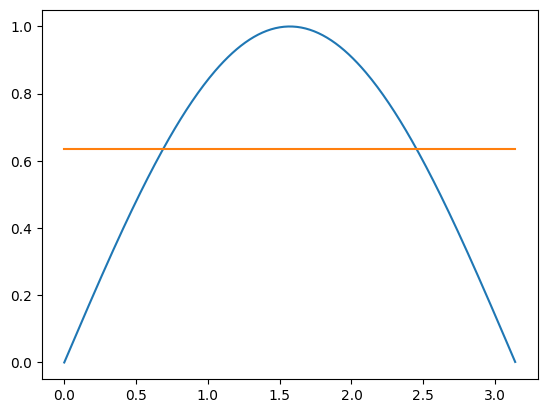

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, np.pi, 0.01)
plt.plot(x, np.sin(x), x, 2/np.pi + 0*x)
plt.show()

## Задача III.5.12

> Ниже предоставлены данные переписи население США. Используя многочлены степеней $N=2, 3, 4, 5$, построить аппроксимацию 
этих данных в смысле МНК. Аппроксимацию можно строить на основе базисных многочленов следующих видов:
> - а) $f_N(x)=\sum\limits_{n=0}^N p_n x^n$
> - б) $f_N(x)=\sum\limits_{n=0}^N p_n (x-1910)^n$
> - в) $f_N(x)=\sum\limits_{n=0}^N p_n (x-1955)^n$
> - г) $f_N(x)=\sum\limits_{n=0}^N p_n ((x-1955)/45)^n$
>
> Какое представление базисных многочленов является наилучшим?
>
> Используйте построенные приближения для предсказания численности населения США в 2010 году и сравните с точным результатом в 308 
745 538 человек

### Реализация МНК и общее решение задачи

Данные переписи: $X$ - год, $Y$ - население

In [2]:
X = np.array(
    [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000], 
    dtype=np.float32
)
Y = np.array(
    [92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906], 
    dtype=np.float32
)

Определим аппроксимируемую функцию $y:X\rightarrow Y$, базисные $\varphi_i:\mathbb{R}\rightarrow\mathbb{R}$ и скалярное произведение $(f,g)=\sum\limits_{x\in X} f(x)g(x)$

In [3]:
def y(x):
    return Y[np.where(X==x)[0][0]]

def phi(i):
    pass

def dot(f, g):
    return np.sum([f(x)*g(x) for x in X])

Создадим функции
- `approx(n)` аппроксимирует функцию $y(x)$ в виде $f_n(x)=\sum_{i=0}^n p_i\varphi_i(x)$ по МНК;
- `draw(f,n)` отрисовывает $y(x)$ и $f_n(x)$;
- `main()` выполняет поставленную задачу.

In [4]:
def approx(n):
    n = n+1
    gram = np.array([[dot(phi(i), phi(j)) for j in range(n)] for i in range(n)])
    proj = np.array([dot(phi(i), y) for i in range(n)])
    p = np.linalg.solve(gram, proj)
    P = lambda x: np.sum(np.dot(p, np.array([phi(i)(x) for i in range(n)])))
    return np.vectorize(P)

def draw(f, n, package=False, double=False, point=None):
    D = np.arange(1902.5, 2015, 2.5)
    legend_list = ['Data', f'N={n}']
    plt.axis([1900, 2015, 0, 3.5e8])
    plt.xlabel('Year', color='black')
    plt.ylabel('Population', color='black')
    plt.grid(True)
    plt.scatter(X, Y)
    plt.plot(D, f(D))
    if package:
        g = np.poly1d(np.polyfit(X.astype(np.float64), Y.astype(np.float64), n) if double else np.polyfit(X, Y, n))
        plt.plot(D, np.vectorize(g)(D), '--')
        legend_list.append('NumPy')
    if point:
        plt.plot(point[0], point[1], 'ro')
        legend_list.append('Point')
    plt.legend(legend_list, loc='best')
    plt.show()

def main():
    x0, y0 = 2010, 308745538
    for n in range(2, 5+1):
        f = approx(n)
        draw(f, n, point=(x0, y0))
        print(f'Population forecast for 2010 is {f(x0):9.0f}, relative variance {np.abs(1-f(x0)/y0)*100:2.2f}%')

### Пункт а

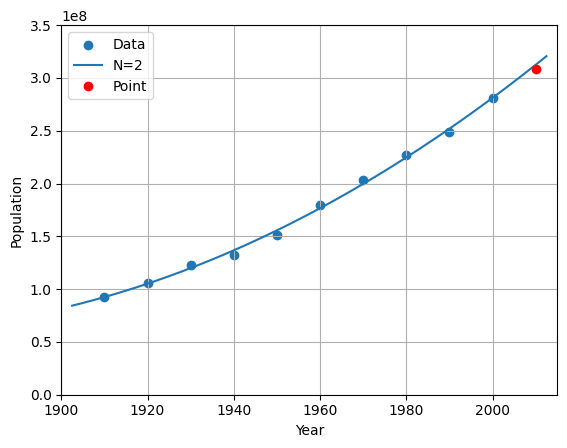

Population forecast for 2010 is 312470352, relative variance 1.21%


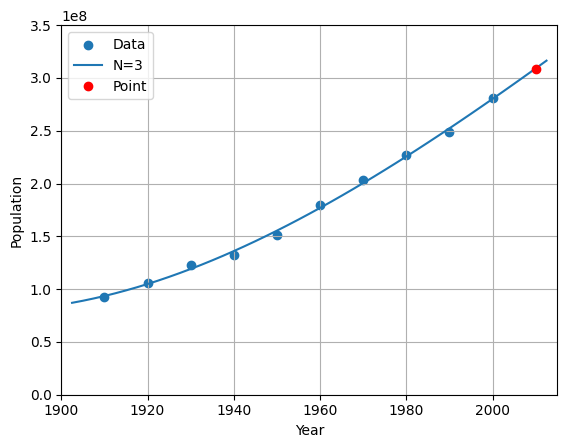

Population forecast for 2010 is 309020525, relative variance 0.09%


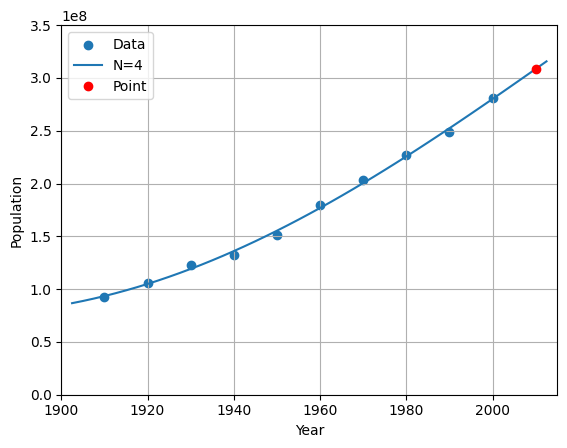

Population forecast for 2010 is 308519893, relative variance 0.07%


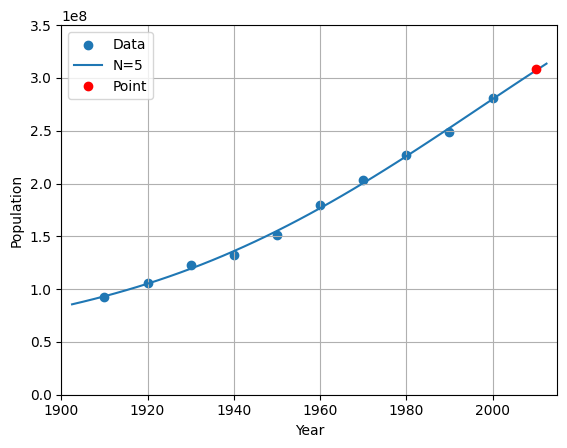

Population forecast for 2010 is 306929242, relative variance 0.59%


In [5]:
def phi(i):
    return lambda x: x**i

main()

### Пункт г

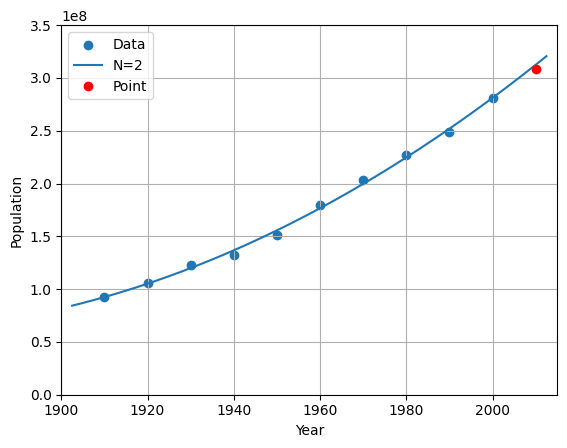

Population forecast for 2010 is 312470352, relative variance 1.21%


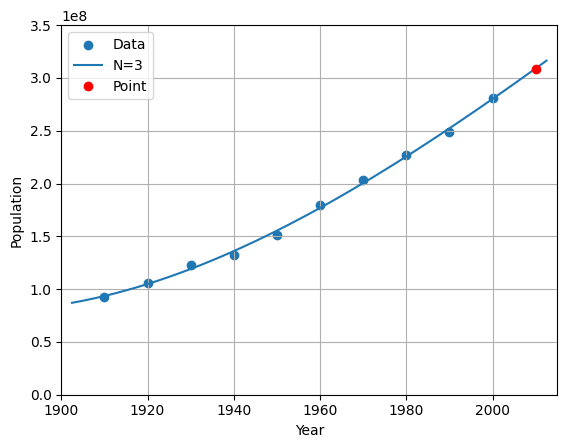

Population forecast for 2010 is 309021006, relative variance 0.09%


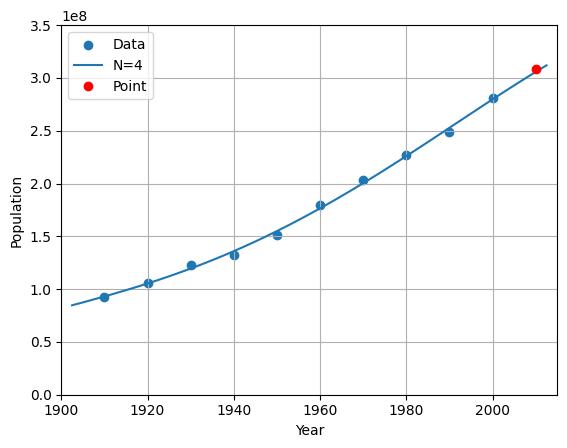

Population forecast for 2010 is 305706202, relative variance 0.98%


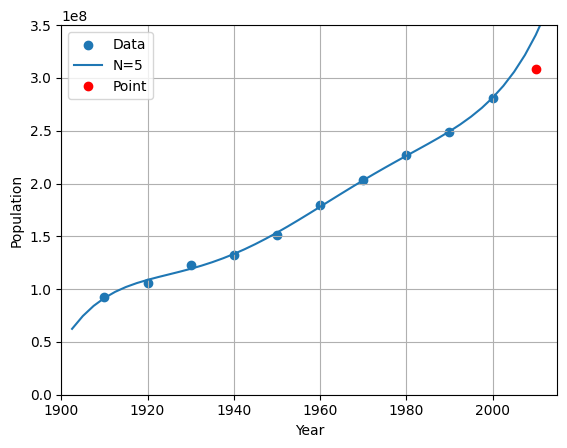

Population forecast for 2010 is 340607763, relative variance 10.32%


In [6]:
def phi(i):
    return lambda x: ((x-1955)/45)**i

main()

### Анализ результатов

В теории мы должны получить одинаковые графики, поскольку это один и тот же многочлен, записанный по разным степеням, однако при больших $n$ они сильно расходятся. Это связано с машинным представлением чисел: в пункте а при подсчете матрицы Грама работаем с числами в диапазоне $\sim$ от $2000$ до $2000^{10}$, когда в пункте г - с числами, абсолютное значение которых лежит между $\sim10^{-10}$ и $1$, что приводит к различным погрешностям методов.

Сравним получившиеся аппроксимации с пакетным `np.polyfit`:

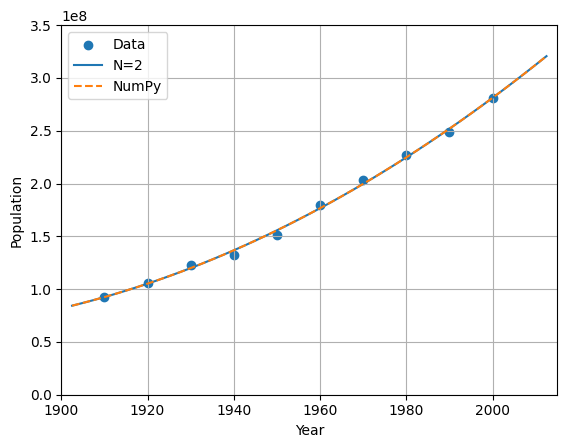

C:\Users\zhams\AppData\Local\Temp\ipykernel_41436\1744697668.py:19: RankWarning: Polyfit may be poorly conditioned
  g = np.poly1d(np.polyfit(X.astype(np.float64), Y.astype(np.float64), n) if double else np.polyfit(X, Y, n))


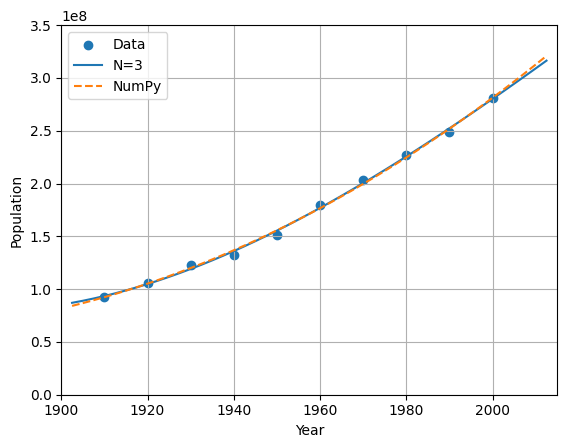

C:\Users\zhams\AppData\Local\Temp\ipykernel_41436\1744697668.py:19: RankWarning: Polyfit may be poorly conditioned
  g = np.poly1d(np.polyfit(X.astype(np.float64), Y.astype(np.float64), n) if double else np.polyfit(X, Y, n))


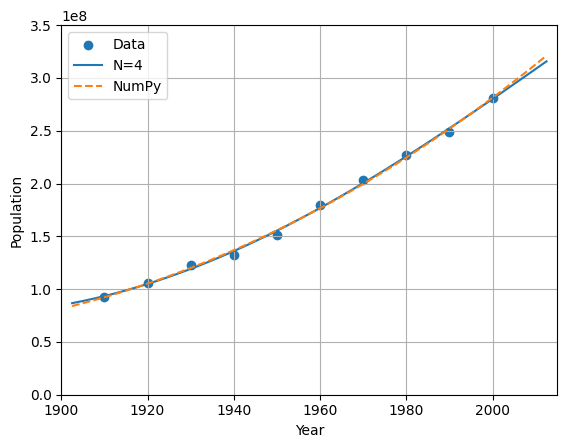

C:\Users\zhams\AppData\Local\Temp\ipykernel_41436\1744697668.py:19: RankWarning: Polyfit may be poorly conditioned
  g = np.poly1d(np.polyfit(X.astype(np.float64), Y.astype(np.float64), n) if double else np.polyfit(X, Y, n))


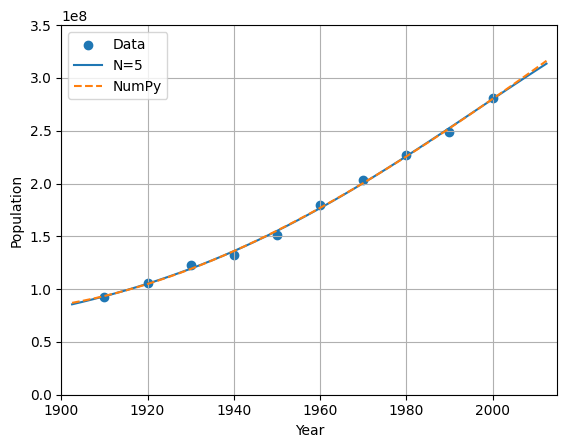

In [7]:
def phi(i):
    return lambda x: x**i

for n in range(2, 5+1):
    f = approx(n)
    draw(f, n, package=True)

Видим предупреждение о плохой обусловленности `np.polyfit`, повысим точность вычислений и повторим.

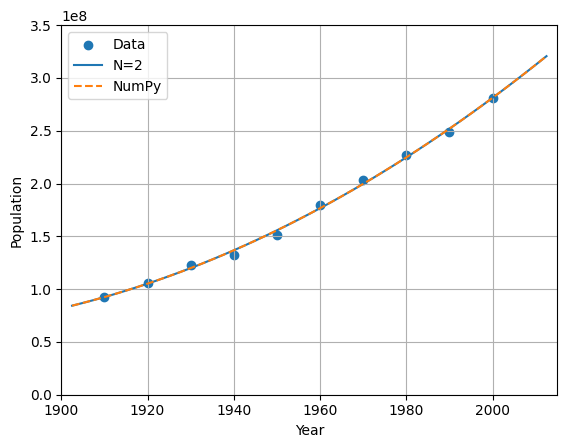

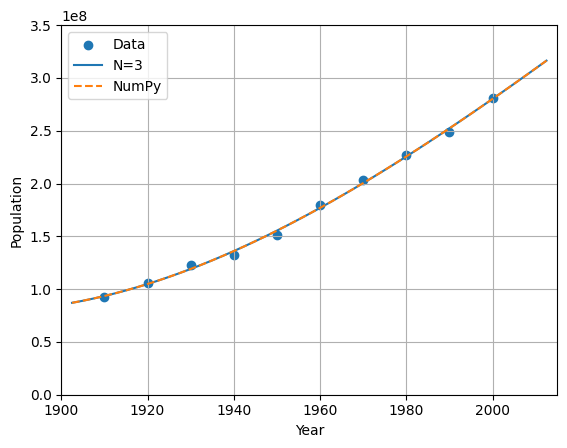

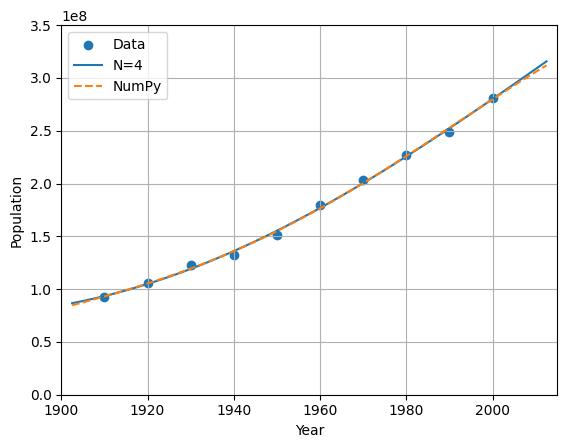

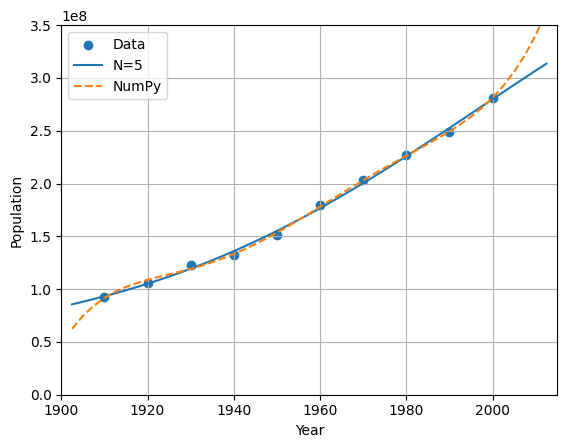

In [8]:
for n in range(2, 5+1):
    f = approx(n)
    draw(f, n, package=True, double=True)

При $N=4$ появляется небольшое расхождение, при $N=5$ расхождение велико, особенно вне $X$. Для пункта г же аппроксимация совпадает с пакетной при всех $N=2,3,4,5$.

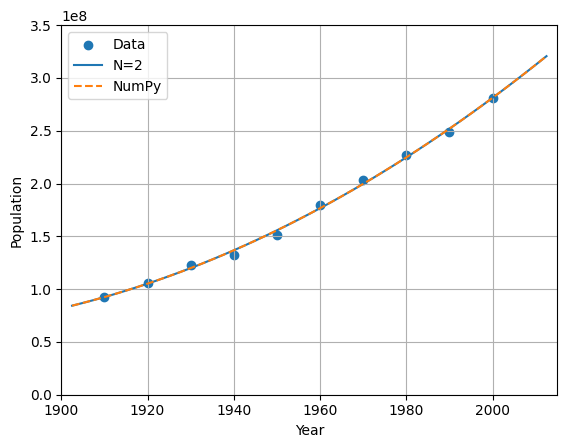

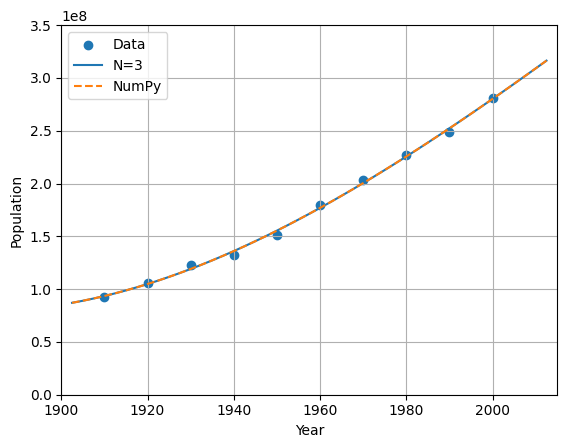

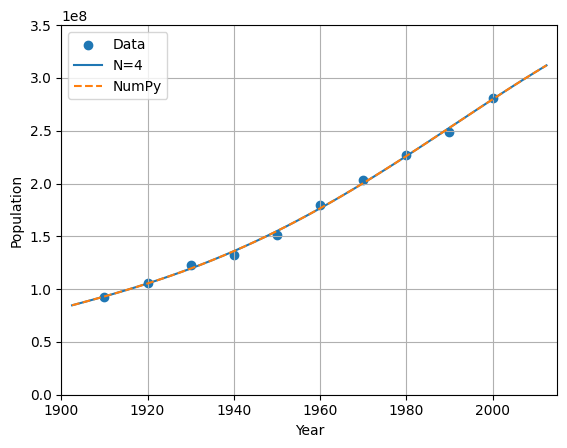

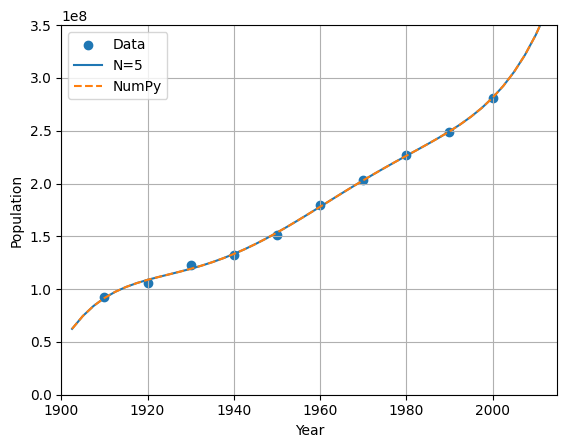

In [9]:
def phi(i):
    return lambda x: ((x-1955)/45)**i

for n in range(2, 5+1):
    f = approx(n)
    draw(f, n, True, True)

### Вывод

Хоть мы и выяснили, что приближение в пункте а) неточное в силу погрешностей, видим, что оно лучше предсказало население на 2010 год, когда пункт г) при больших $N$ начинает сильно отклоняться от точного значения в угоду выборки (резкий спад и рост у краев $X$). Таким образом, можно заключить, что пункт 
- а) более применим для экстраполяции: погрешности нивелируют случайные колебания в населении, что лучше сказывается на ожидаемых значениях вне отрезка $[\min{X}, \max{X}]$;
- г) для интерполяции: получившееся приближение плавно проходит через все точки выборки, что позволяет вычислять значения между ними с высокой точностью.

Также отметим, что библиотечный метод при одинарной точности вычислений совпадает с а), при двойной точности - с г), поэтому полиномиальное приближение по $X$ для повышения точности имеет смысл искать по степеням
$$\left(\frac{x-x_0}{a}\right)^n, x_0=\frac{\max{X}+\min{X}}{2}, a=\frac{\max{X}-\min{X}}{2}$$

Этот прием уменьшает число обусловленности матрицы Грама, например, в данной задаче в пункте а (по степеням $x^n$) $\mu(G)=2\cdot10^{37}$, в пункте г (по степеням $(\frac{x-x_0}{a})^n$)  $\mu(G)=1600$ при $N=5$.